In [6]:
import pandas as pd
import matplotlib.pyplot as plt


#use o encoding por causa do tipo de padrão que vem fonte: https://www.roelpeters.be/unicodedecodeerror-utf-8-codec-cant-decode-byte-in-position/
df_chamados = pd.read_csv(r'C://Users/OSO/Documents/KPIS Suporte/chamados.csv', encoding = 'ISO-8859-1', sep=';')

#converter valor da tabela para data (atualmente esta como object)
df_chamados['ABERTO EM'] = pd.to_datetime(df_chamados['ABERTO EM'], format = '%d/%m/%Y')
display(df_chamados)

df_chamados.info()


,.,CHAMADO,ABERTO EM,CLIENTE,TIPO,STATUS ATUAL,ANALISTA,PRIORIDADE,ABERTO POR,RESOLVIDO EM,...,CHAVE PROJETO,CLASSIFICAÇÃO,CSAT,PRODUTO,RESOLUÇÃO,RESUMO,SLA RESOLUÇÃO,SLA RESPOSTA,SLA RESPOSTA (RESTANTE),SLA SOLUÇÃO (RESTANTE)
0,link,GEHC-4,2019-06-24,GE Healthcare,Incidente,Fechado,Guilherme Albino da Costa,Baixa,Former user,4/7/2019,...,GEHC,BUG_CORE,-,ECOMEX Importação - Localização Brasil,Data Fix,GEINC4314865,1.Dentro do prazo,1.Dentro do prazo,28h 39m,11h 36m
1,link,GEHC-3,2019-06-24,GE Healthcare,Incidente,Fechado,Guilherme Albino da Costa,Alta,Guilherme Albino da Costa,24/6/2019,...,GEHC,-,5,NaN,Sem Ação,Teste de abertura de chamados GEHC,0.Fora do prazo,0.Fora do prazo,-4m,-4m
2,link,GEHC-2,2019-06-24,GE Healthcare,Incidente,Fechado,Guilherme Albino da Costa,Alta,Guilherme Albino da Costa,24/6/2019,...,GEHC,SEM_ACAO,-,NaN,Feito,[JIRA] ¿ gehc1@ecomex.atlassian.net está pronto,1.Dentro do prazo,1.Dentro do prazo,3h 57m,3h 57m
3,link,GEHC-5,2019-06-24,GE Healthcare,Incidente,Fechado,Guilherme Albino da Costa,Alta,JULLI.TAKAHASHI@ge.com,24/6/2019,...,GEHC,SEM_ACAO,-,NaN,Sem Ação,GEINC4309521cancelado,1.Dentro do prazo,1.Dentro do prazo,3h 21m,3h 21m
4,link,BSH-1,2019-06-25,Robert Bosch,Incidente,Fechado,Guilherme Albino da Costa,Alta,Guilherme Albino da Costa,25/6/2019,...,BSH,-,-,NaN,Sem Ação,Abertura de incidente,1.Dentro do prazo,1.Dentro do prazo,7h 57m,11h 57m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24989,link,NORG-73,2022-07-22,NORGREN LTDA,Incidente,Aberto,SEM ANALISTA,Média,Cristiane Magalhães,-,...,NORG,-,-,NaN,SEM RESOLUÇÃO,executação web atualizar tabela,-,1.Dentro do prazo,10h 46m,-
24990,link,MUN-57,2022-07-22,MUNDIAL DISTRIBUIDORA DE PRODUTOS DE CONSUMO LTDA,Incidente,Aberto,SEM ANALISTA,Média,Maiquel Morais,-,...,MUN,-,-,NaN,SEM RESOLUÇÃO,DUE - Erro ao enviar,-,1.Dentro do prazo,16h,-
24991,link,MMM-254,2022-07-22,3M DO BRASIL LTDA,Solicitação de Serviço,Aguardando Usuário,Daniel Persona Chamilete,Crítica,Anderson Araújo,-,...,MMM,-,-,NaN,SEM RESOLUÇÃO,Problema no Lote de Pagamentos Importação,1.Dentro do prazo,1.Dentro do prazo,34h 19m,120h
24992,link,MAX-514,2022-07-22,IOCHPE-MAXION S.A,Incidente,Aguardando Usuário,Daniel Persona Chamilete,Média,Arildo Astolfo,-,...,MAX,-,-,NaN,SEM RESOLUÇÃO,Erro ao tentar carregar (Up-load) as taxas par...,1.Dentro do prazo,1.Dentro do prazo,8h 5m,40h


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24994 entries, 0 to 24993
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   .                        24994 non-null  object        
 1   CHAMADO                  24994 non-null  object        
 2   ABERTO EM                24994 non-null  datetime64[ns]
 3   CLIENTE                  24994 non-null  object        
 4   TIPO                     24994 non-null  object        
 5   STATUS ATUAL             24994 non-null  object        
 6   ANALISTA                 24994 non-null  object        
 7   PRIORIDADE               24994 non-null  object        
 8   ABERTO POR               24994 non-null  object        
 9   RESOLVIDO EM             24994 non-null  object        
 10  ESCALADO                 24994 non-null  object        
 11  FUNCIONALIDADE           24994 non-null  object        
 12  UNIDADE ATENDIMENTO      24994 n

<function matplotlib.pyplot.show(close=None, block=None)>

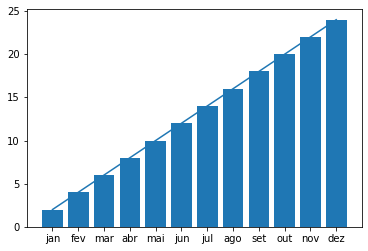

In [5]:
mes = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
valor = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
plt.plot(mes, valor)
plt.bar(mes, valor)
plt.show

#total_chamados = df_chamados.value_counts()
#qtde_chamados = len(df_chamados.index)
#print(qtde_chamados)

In [9]:
#adicionar colunas de ano, mes e dia
df_chamados["Ano"] = df_chamados['ABERTO EM'].dt.year
df_chamados['Mes'] = df_chamados['ABERTO EM'].dt.month
df_chamados['Dia'] = df_chamados['ABERTO EM'].dt.day


In [11]:
display(df_chamados.head())

,.,CHAMADO,ABERTO EM,CLIENTE,TIPO,STATUS ATUAL,ANALISTA,PRIORIDADE,ABERTO POR,RESOLVIDO EM,...,PRODUTO,RESOLUÇÃO,RESUMO,SLA RESOLUÇÃO,SLA RESPOSTA,SLA RESPOSTA (RESTANTE),SLA SOLUÇÃO (RESTANTE),Ano,Mes,Dia
0,link,GEHC-4,2019-06-24,GE Healthcare,Incidente,Fechado,Guilherme Albino da Costa,Baixa,Former user,4/7/2019,...,ECOMEX Importação - Localização Brasil,Data Fix,GEINC4314865,1.Dentro do prazo,1.Dentro do prazo,28h 39m,11h 36m,2019,6,24
1,link,GEHC-3,2019-06-24,GE Healthcare,Incidente,Fechado,Guilherme Albino da Costa,Alta,Guilherme Albino da Costa,24/6/2019,...,NaN,Sem Ação,Teste de abertura de chamados GEHC,0.Fora do prazo,0.Fora do prazo,-4m,-4m,2019,6,24
2,link,GEHC-2,2019-06-24,GE Healthcare,Incidente,Fechado,Guilherme Albino da Costa,Alta,Guilherme Albino da Costa,24/6/2019,...,NaN,Feito,[JIRA] ¿ gehc1@ecomex.atlassian.net está pronto,1.Dentro do prazo,1.Dentro do prazo,3h 57m,3h 57m,2019,6,24
3,link,GEHC-5,2019-06-24,GE Healthcare,Incidente,Fechado,Guilherme Albino da Costa,Alta,JULLI.TAKAHASHI@ge.com,24/6/2019,...,NaN,Sem Ação,GEINC4309521cancelado,1.Dentro do prazo,1.Dentro do prazo,3h 21m,3h 21m,2019,6,24
4,link,BSH-1,2019-06-25,Robert Bosch,Incidente,Fechado,Guilherme Albino da Costa,Alta,Guilherme Albino da Costa,25/6/2019,...,NaN,Sem Ação,Abertura de incidente,1.Dentro do prazo,1.Dentro do prazo,7h 57m,11h 57m,2019,6,25
